# Correlation Between Samples

In [14]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get Data

In [22]:
from common.data import get_data
from common.paths import HEALTHY, WISC

X, Y, demographics, population = get_data(wisc_level=5, label_path=WISC)
ages = demographics['Age']

print(f'X: {X.shape} | Y: {len(Y.keys())} | Age: {ages.shape} | Population: {population}')

X: (380, 34716) | Y: 6 | Age: (380,) | Population: adhd


In [23]:
from scipy import stats

correlations = []

for index, curr_subject in enumerate(X):
    for next_subject in X[index + 1:len(X) + 1]:
        correlations.append(stats.pearsonr(curr_subject, next_subject)[0])

print(len(correlations))

72010


Text(0.5, 1.0, 'Population=adhd, n=380, num_correlations=72010')

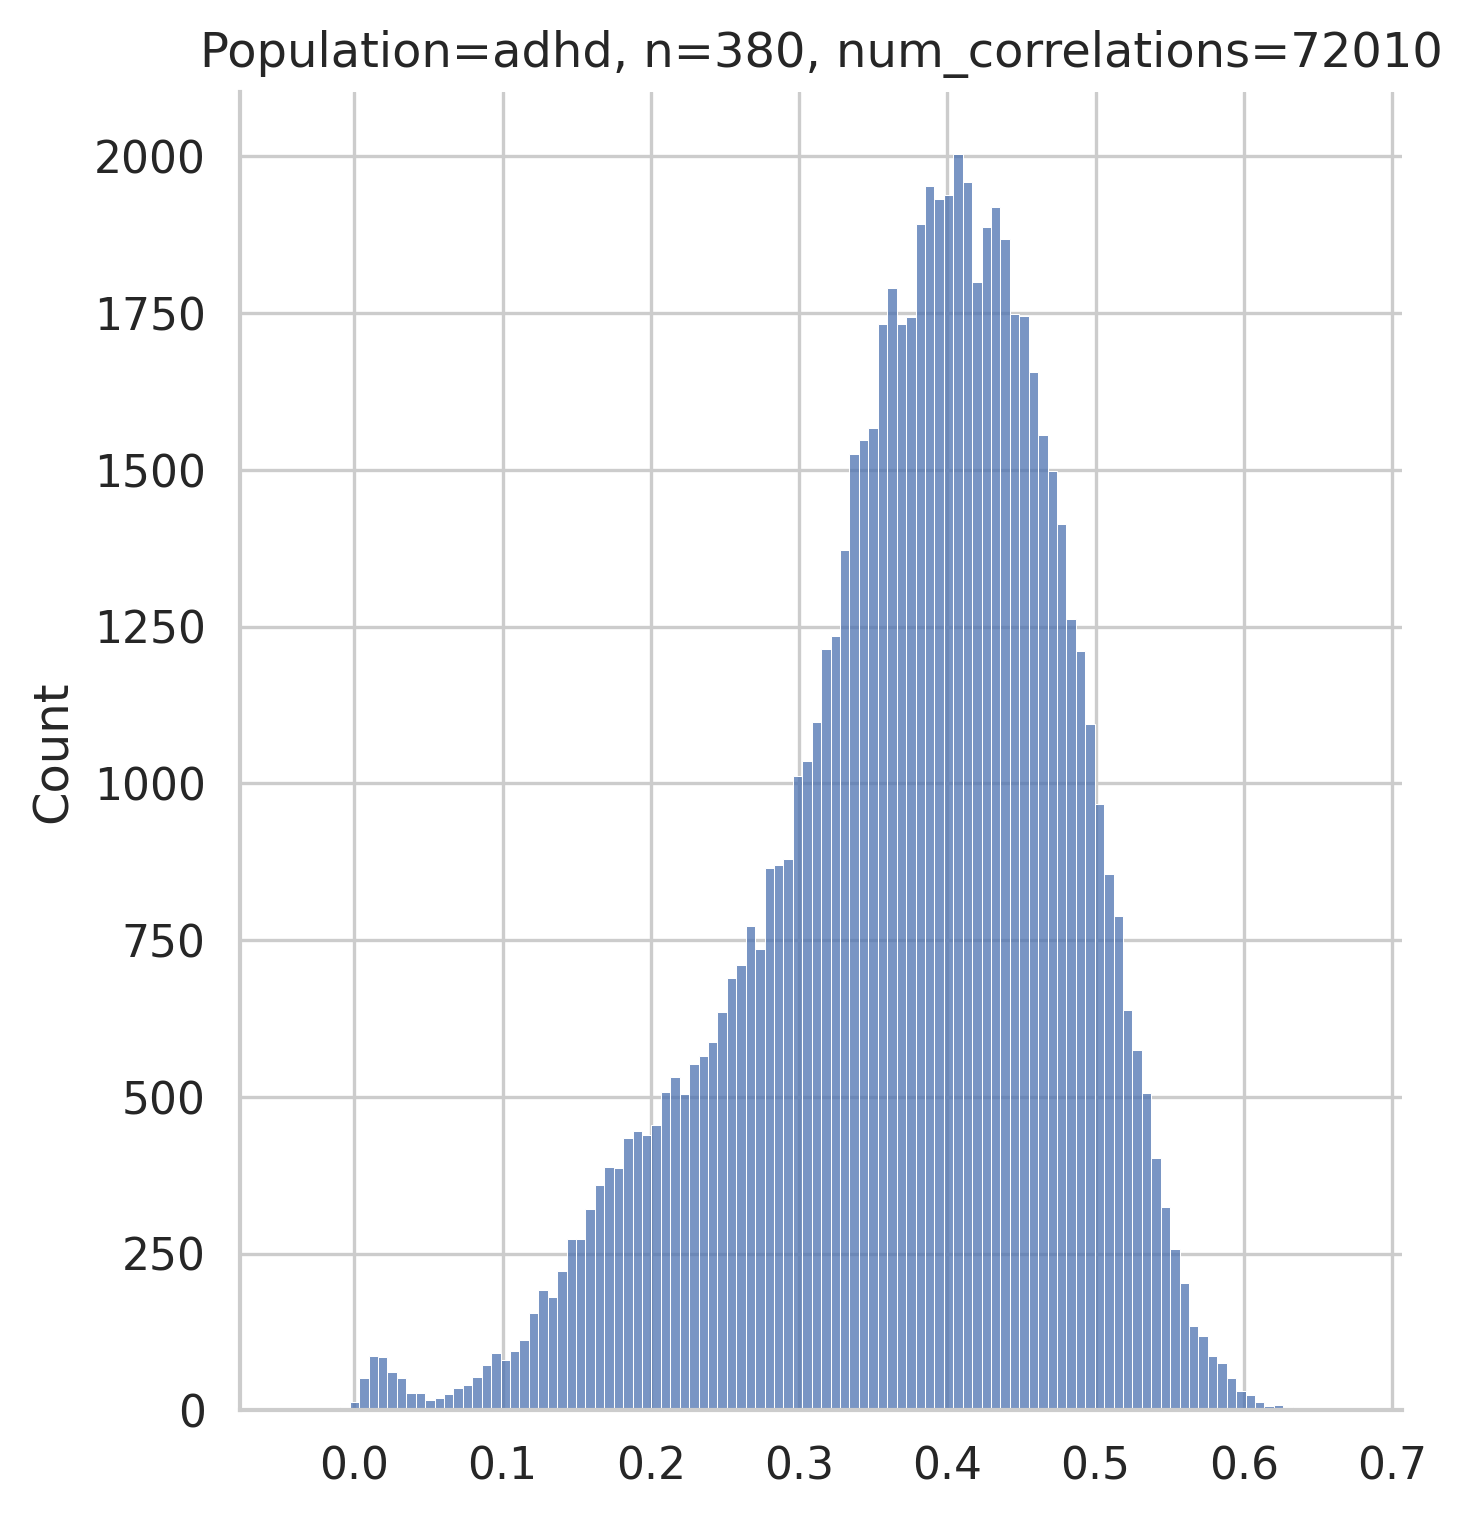

In [24]:
g = sns.displot(correlations)
g.ax.set_title(f'Population={population}, n={len(X)}, num_correlations={len(correlations)}')